#Lab-7

Implement Random forest ensemble method on a given
dataset.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


To Do: Implementation – Random Forest (for Classification)

Write Python code to implement the following. Consider dataset files as “iris.csv”

Build a Random Forest (RF) classifier to classify IRIS flower dataset

Measure prediction score using default n_estimators (10).

Now fine tune your model by changing number of trees in your classifer and identify what best score you can get using how
many trees

Default RF Accuracy (n_estimators=10): 1.0000
Best Accuracy: 1.0000 with n_estimators=1
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


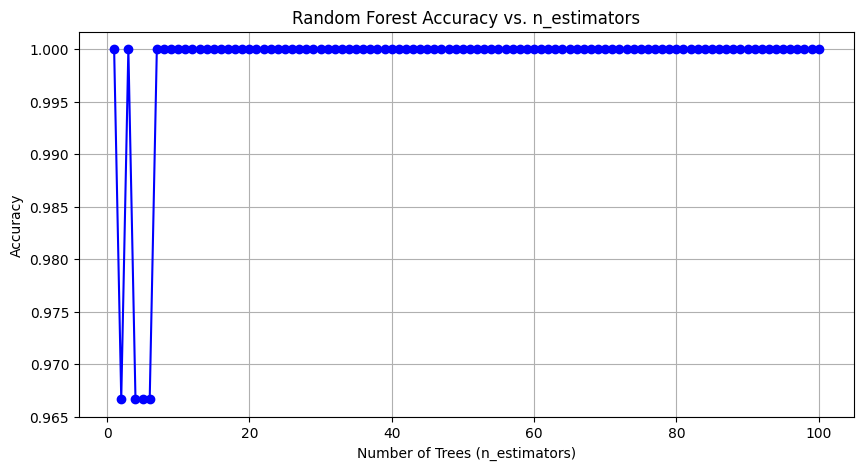

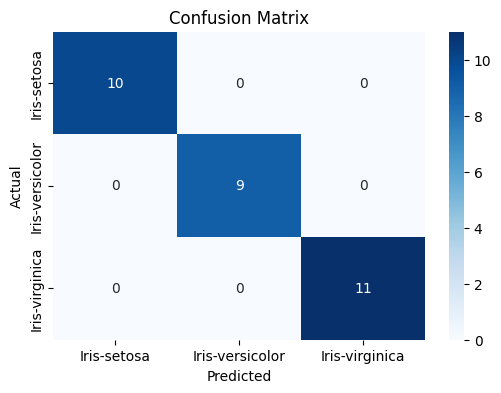

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("iris.csv")

# Separate features and target
X = data.drop("species", axis=1)
y = data["species"]

# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default Random Forest (n_estimators=10)
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default RF Accuracy (n_estimators=10): {default_score:.4f}")

# Fine-tuning: Test different n_estimators values
scores = {}
for n in range(1, 101):  # from 1 to 100 trees
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[n] = acc

# Find the best n_estimators value
best_n = max(scores, key=scores.get)
best_score = scores[best_n]
print(f"Best Accuracy: {best_score:.4f} with n_estimators={best_n}")

# Train and predict with best model
rf_best = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Plotting accuracy vs n_estimators
plt.figure(figsize=(10, 5))
plt.plot(list(scores.keys()), list(scores.values()), marker='o', color='blue')
plt.title("Random Forest Accuracy vs. n_estimators")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Plotting confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_best.classes_, yticklabels=rf_best.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
